In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
%matplotlib inline

#library used to split data to avoid overfitting
from sklearn.model_selection import train_test_split



#import library used for counting the number of observations
from collections import Counter

#libraries required to train models
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


#library used for corss validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

#library used to plot random forest model trees
from sklearn.tree import export_graphviz

#library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

In [16]:
df_data = pd.read_csv('../Desktop/Python/DATASET/WA_Fn-UseC_-Telco-Customer-Churn Final Project Dataset.csv')


In [17]:
df_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [18]:
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
df_data.shape

(7043, 21)

In [21]:
df_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
na_index = df_data[df_data['TotalCharges'].apply(lambda x: x.isspace()) == True].index 

In [23]:
print(na_index)

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


In [26]:
df_data['TotalCharges'] = df_data['TotalCharges'].replace(' ', np.nan)

df_data['TotalCharges'] = df_data['TotalCharges'].astype('float64')

In [28]:
df_data['TotalCharges']=df_data['TotalCharges'].fillna(df_data['TotalCharges'].median())

In [29]:
df_data.drop('customerID', axis=1, inplace=True)

In [30]:
df_data['SeniorCitizen']=df_data['SeniorCitizen'].map({0:'No', 1:'Yes'})

In [31]:
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:xlabel='Churn', ylabel='count'>

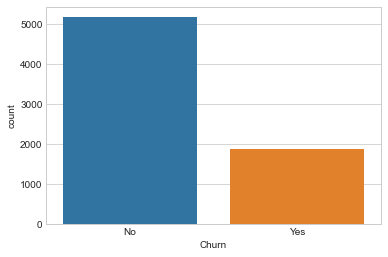

In [32]:
sns.countplot(x="Churn" , data=df_data)

In [34]:
df_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [36]:
cat_cols = [cname for cname in df_data.columns if df_data[cname].dtype=='object' and cname!='Churn']
num_cols = [cname for cname in df_data.columns if df_data[cname].dtype!='object']

print('categorical features: ', cat_cols)
print('numerical features: ', num_cols)

categorical features:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical features:  ['tenure', 'MonthlyCharges', 'TotalCharges']


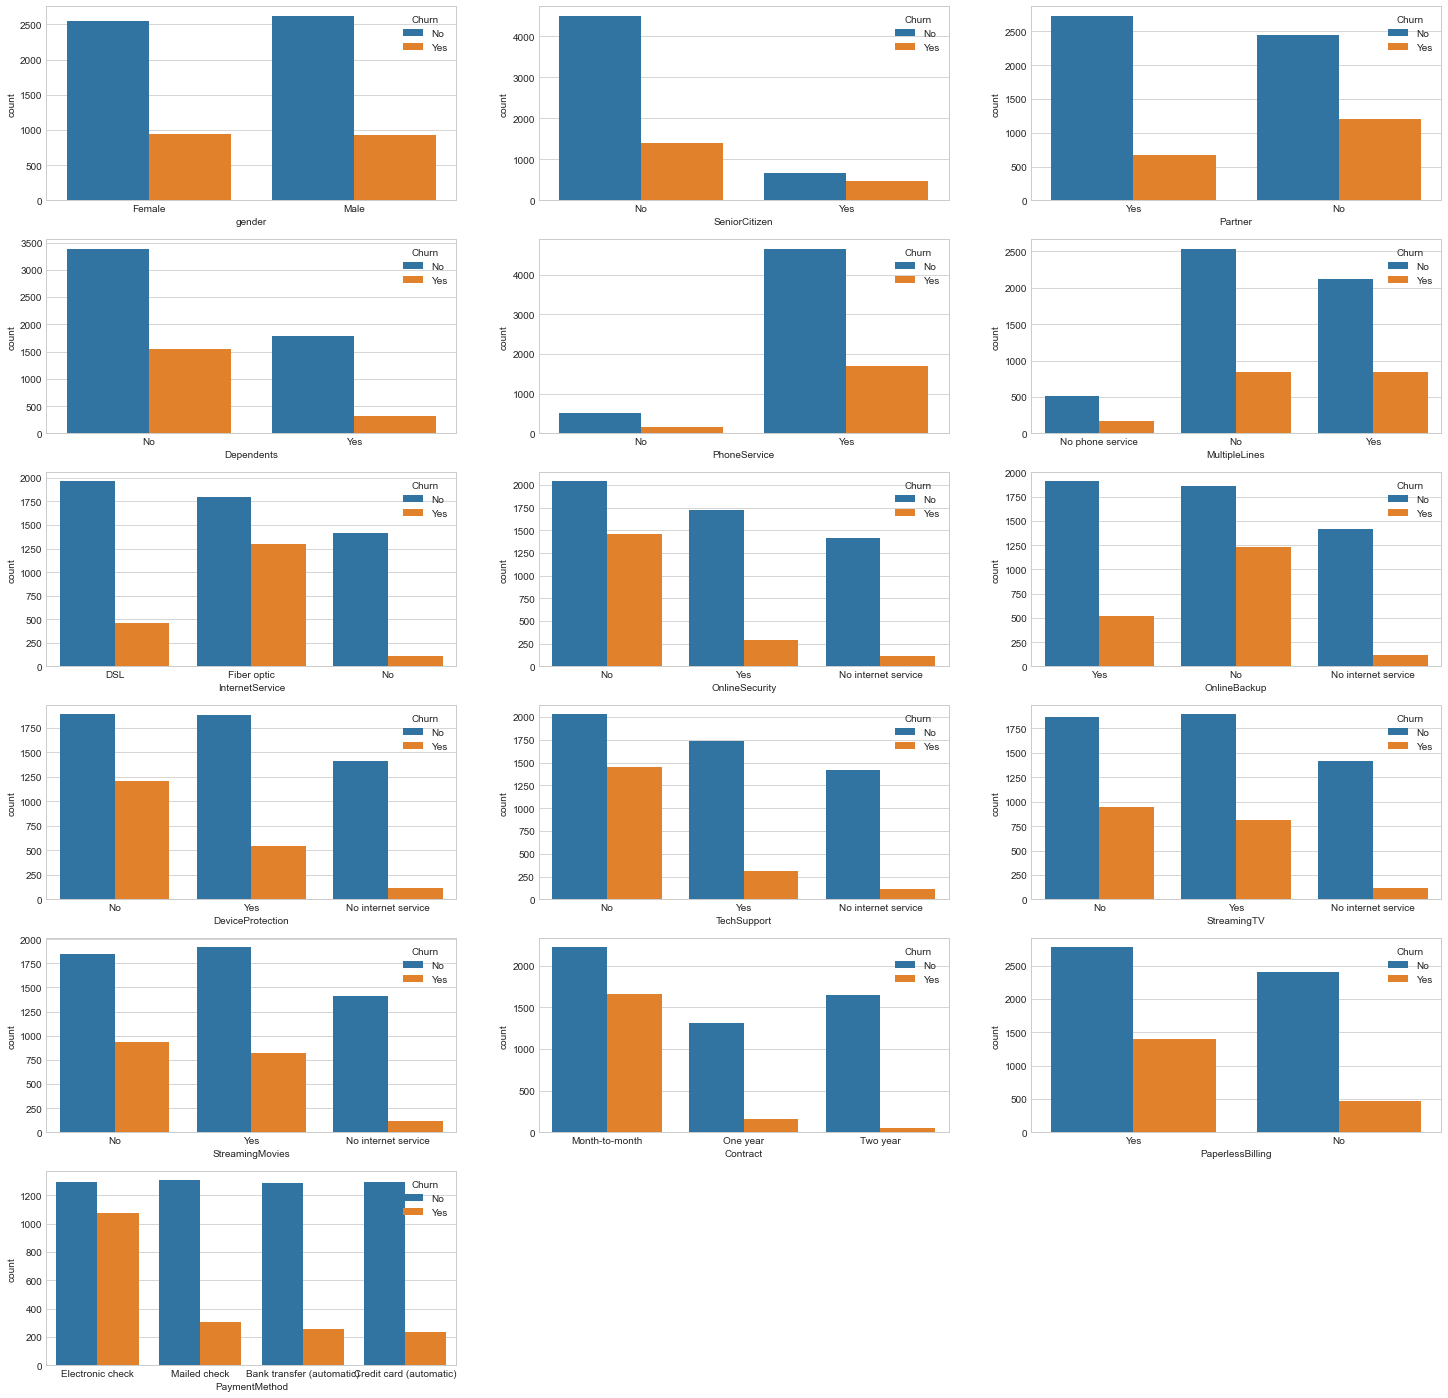

In [37]:
plt.figure(figsize=(25,25))
for i,cat in enumerate(cat_cols):
    plt.subplot(6,3,i+1)
    sns.countplot(data = df_data, x= cat, hue = "Churn")
plt.show()

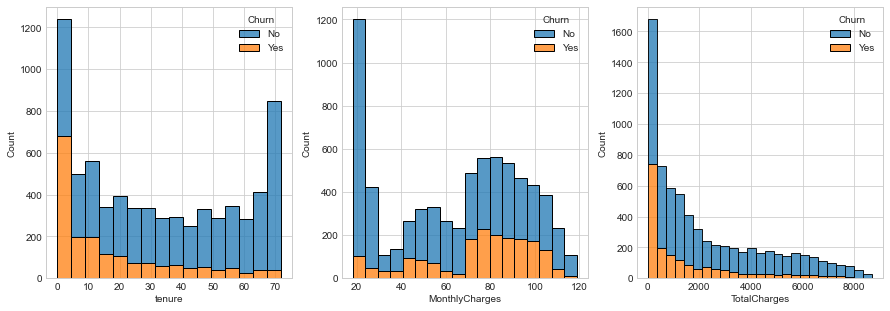

In [38]:
plt.figure(figsize=(15,5))
for j,con in enumerate(num_cols):
    plt.subplot(1,3,j+1)
    sns.histplot(data = df_data, x= con, hue = "Churn", multiple="stack")
plt.show()

In [39]:
df_data['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [40]:
df_data['tenure_grp'] = pd.cut(df_data['tenure'], bins=[0,12,24,36,48,60,np.inf], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '60+'])

In [41]:
df_data['tenure_grp'].value_counts()

0-12     2175
60+      1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_grp, dtype: int64

<AxesSubplot:xlabel='tenure_grp', ylabel='count'>

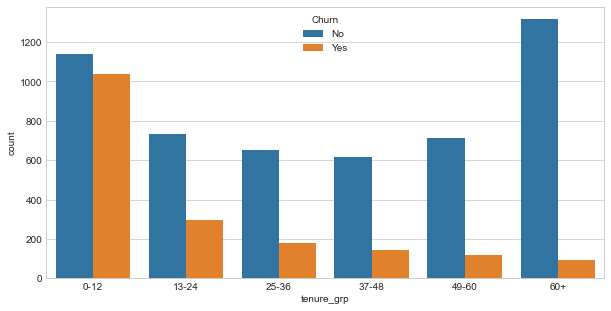

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_data, x='tenure_grp',hue = "Churn")

In [43]:
df_data.drop('tenure' ,axis=1 , inplace=True)

In [44]:
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12


In [45]:
df_data['Churn']=df_data['Churn'].map({'No':0, 'Yes':1})

In [46]:
df_data_dummy = pd.get_dummies(df_data,drop_first=True)
df_data_dummy.head()

,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_13-24,tenure_grp_25-36,tenure_grp_37-48,tenure_grp_49-60,tenure_grp_60+
0,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,53.85,108.15,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

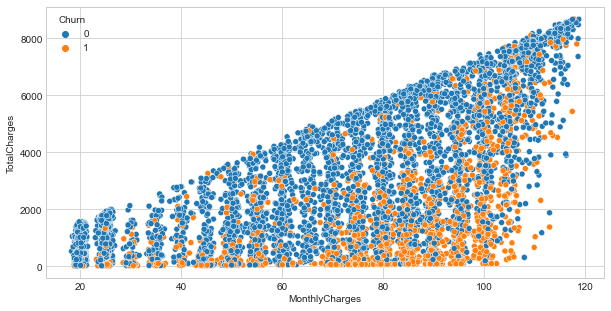

In [47]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df_data_dummy, hue='Churn')

<AxesSubplot:>

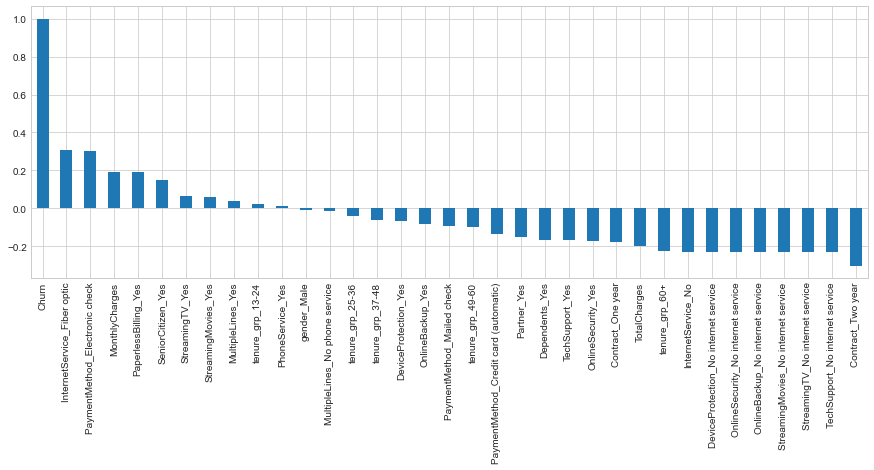

In [51]:
plt.figure(figsize=(15,5))
df_data_dummy.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [52]:
df_data_model = df_data_dummy.copy(deep=True)
df_data_model.head()

,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_13-24,tenure_grp_25-36,tenure_grp_37-48,tenure_grp_49-60,tenure_grp_60+
0,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,53.85,108.15,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [53]:
X = df_data_model.loc[:, df_data_model.columns!='Churn']

#y will contain the target i.e dependent feature
y = df_data_model['Churn']

X.shape, y.shape

((7043, 34), (7043,))

In [54]:
smote = SMOTE()
# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

NameError: name 'SMOTE' is not defined

In [57]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [59]:
import pandas as pd
import numpy as np

# Visualization

from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from xgboost import XGBRegressor
from xgboost import plot_importance

ModuleNotFoundError: No module named 'plotly'

In [65]:
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-12
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-12


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
print('X train size: ', len(X_train))
print('X test size: ', len(X_test))
print('y train size: ', len(y_train))
print('y test size: ', len(y_test))

X train size:  4930
X test size:  2113
y train size:  4930
y test size:  2113


In [67]:
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'MultipleLines',
                data = churn, order =churn['MultipleLines'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Multiple Lines', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x MultipleLines', size = 18)
def percent(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 14)
percent(ax, churn.MultipleLines)

NameError: name 'churn' is not defined

<Figure size 1080x648 with 0 Axes>

In [62]:
encoder = OrdinalEncoder()
categorical_columns_train = [col for col in X_train.columns if X_train[col].dtype == 'object']
X_train[categorical_columns_train] = encoder.fit_transform(X_train[categorical_columns_train])
categorical_columns_test = [col for col in X_test.columns if X_test[col].dtype == 'object']
X_test[categorical_columns_test] = encoder.transform(X_test[categorical_columns_test])

NameError: name 'encoder' is not defined

In [68]:
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'InternetService',
                data = churn, order =churn['InternetService'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Internet Service', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Internet Service', size = 18)
percent(ax, churn.InternetService)

NameError: name 'churn' is not defined

<Figure size 1080x648 with 0 Axes>

In [70]:
X = df_data.drop('Churn', axis = 1)
y = df_data.Churn
print('= = = = = = = = = = Independent Variables = = = = = = = = = =\n')
print(X)
print('= = = = = = = = = = Target Variable = = = = = = = = = = = = =\n')
print(y)

= = = = = = = = = = Independent Variables = = = = = = = = = =

      gender SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0     Female            No     Yes         No           No  No phone service   
1       Male            No      No         No          Yes                No   
2       Male            No      No         No          Yes                No   
3       Male            No      No         No           No  No phone service   
4     Female            No      No         No          Yes                No   
...      ...           ...     ...        ...          ...               ...   
7038    Male            No     Yes        Yes          Yes               Yes   
7039  Female            No     Yes        Yes          Yes               Yes   
7040  Female            No     Yes        Yes           No  No phone service   
7041    Male           Yes     Yes         No          Yes               Yes   
7042    Male            No      No         No          Ye

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
print('X train size: ', len(X_train))
print('X test size: ', len(X_test))
print('y train size: ', len(y_train))
print('y test size: ', len(y_test))

X train size:  4930
X test size:  2113
y train size:  4930
y test size:  2113


In [74]:
from sklearn.preprocessing import OrdinalEncoder

In [75]:
encoder = OrdinalEncoder()
categorical_columns_train = [col for col in X_train.columns if X_train[col].dtype == 'object']
X_train[categorical_columns_train] = encoder.fit_transform(X_train[categorical_columns_train])
categorical_columns_test = [col for col in X_test.columns if X_test[col].dtype == 'object']
X_test[categorical_columns_test] = encoder.transform(X_test[categorical_columns_test])

In [76]:
X_train

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_grp
5925,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,2.0,68.70,1416.20,13-24
4395,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,103.95,7446.90,60+
1579,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,80.45,950.20,0-12
1040,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,90.45,1266.10,13-24
1074,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,21.10,21.10,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,100.50,918.60,0-12
5192,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,19.95,1189.90,49-60
3980,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,105.70,2979.50,25-36
235,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,54.40,114.10,0-12


In [77]:
X_test

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_grp
3381,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,79.85,3320.75,37-48
6180,0.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,0.0,102.40,6471.85,60+
4829,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45.00,524.35,0-12
3737,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,50.60,249.95,0-12
4249,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,3.0,65.90,660.05,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,40.25,411.45,0-12
1351,1.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,20.45,250.80,0-12
2048,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,96.80,2030.30,13-24
6218,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,58.40,4113.15,60+


In [78]:
y_train.replace({'Yes' : 1,
                'No' : 0}, inplace = True)
y_train.value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [80]:
y_test.replace({'Yes' : 1,
                'No' : 0}, inplace = True)
y_test.value_counts()

0    1585
1     528
Name: Churn, dtype: int64

In [82]:
from sklearn.preprocessing import StandardScaler

In [84]:
X_train

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_grp
5925,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,2.0,68.70,1416.20,13-24
4395,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,103.95,7446.90,60+
1579,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,80.45,950.20,0-12
1040,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,90.45,1266.10,13-24
1074,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,21.10,21.10,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,100.50,918.60,0-12
5192,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,19.95,1189.90,49-60
3980,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,105.70,2979.50,25-36
235,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,54.40,114.10,0-12


In [86]:
num_col = [ 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [87]:
X_train

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_grp
5925,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,2.0,0.129755,-0.379352,13-24
4395,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,1.299897,2.278741,60+
1579,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,0.519802,-0.584746,0-12
1040,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.851757,-0.445510,13-24
1074,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,-1.450350,-0.994256,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,1.185372,-0.598674,0-12
5192,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,-1.488525,-0.479096,49-60
3980,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,1.357989,0.309689,25-36
235,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.344940,-0.953266,0-12


In [88]:
X_test

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_grp
3381,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.499885,0.460098,37-48
6180,0.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,0.0,1.248444,1.848978,60+
4829,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.656978,-0.772444,0-12
3737,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.471083,-0.893388,0-12
4249,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,3.0,0.036808,-0.712632,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,-0.814656,-0.822205,0-12
1351,1.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,-1.471927,-0.893014,0-12
2048,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,1.062549,-0.108681,13-24
6218,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,-0.212158,0.809357,60+


In [89]:
y_train.value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [90]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

NameError: name 'SMOTE' is not defined

In [91]:
y_train.value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [95]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [92]:
# Running Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_predict = rf.predict(X_test)

#Running Ada Boost
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_y_predict = ab.predict(X_test)

# Running Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_y_predict = gb.predict(X_test)

# Running Extra Trees Classifier
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
et_y_predict = et.predict(X_test)

ValueError: could not convert string to float: '13-24'

In [93]:
# Random Forest
print('Accuracy: %.2f%%' % (accuracy_score(y_test, rf_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, rf_y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, rf_y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, rf_y_predict) * 100))
confusion_matrix_rf = confusion_matrix(y_test, rf_y_predict)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

NameError: name 'rf_y_predict' is not defined

In [94]:
print('Accuracy: %.2f%%' % (accuracy_score(y_test, ab_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, ab_y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, ab_y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, ab_y_predict) * 100))
confusion_matrix_ab = confusion_matrix(y_test, ab_y_predict)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_ab, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Ada Boost')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

NameError: name 'ab_y_predict' is not defined